In [33]:
%precision 3

'%.3f'

## 1차원 데이터

- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [70]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/ch2_scores_em.csv', index_col="student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [71]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [74]:
# p.32
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [76]:
# p.33 평균값
print(sum(scores) / len(scores))
print(np.mean(scores))
# 데이터프레임에선 mean
print(scores_df.mean())

55.0
55.0
score    55.0
dtype: float64


In [77]:
# 중앙값 p.36
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [79]:
# 인덱스로 계산. 인덱스 0부터 시작하기때문에 1 높이나옴
n = len(sorted_scores)
if n % 2 == 0 :
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else :
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [80]:
# 중앙값
np.median(scores)

56.5

In [81]:
scores_df.median()

score    56.5
dtype: float64

In [82]:
# mode() : 최빈값 (질적데이터 구할 때 사용)
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [83]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [85]:
# 편차
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [86]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [88]:
print(np.mean(deviation))
print(np.mean(another_deviation))

0.0
0.0


In [89]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [90]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [92]:
# 분산 p.44
np.mean(deviation ** 2)

86.0

In [94]:
# 분산 : np.var()
np.var(scores)

86.0

In [99]:
# 판다스는 불편분산(ddof=1)이 디폴트.
print(scores_df.var())
print(scores_df.var(ddof=0)) # 표본분산

score    95.555556
dtype: float64
score    86.0
dtype: float64


In [100]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [102]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [110]:
# 표준편차 p.48. 분산의 루트는 표준편차
print(np.sqrt(np.var(scores, ddof = 0)))
print(np.std(scores, ddof=0))

9.273618495495704
9.273618495495704


In [111]:
# 범위 p.49
np.max(scores) - np.min(scores)

28

In [112]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [113]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

- 과제 08/22 (2)

20개의 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.

In [17]:
# np.array, sum()/len(), 편차 39p, 편차의 합,평균=0(p40,41)
import numpy as np
# 배열
ar = np.array(range(20))
print(f'배열 : {ar}')
# 평균
mean = sum(ar)/len(ar) # np.mean(ar)
print(f'평균 : {mean}')
# 편차
deviation = ar - mean
print(f'편차 : {deviation}')
# 편차의 합
print(f'편차의 합 : {sum(deviation)}')

배열 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
평균 : 9.5
편차 : [-9.5 -8.5 -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5
  4.5  5.5  6.5  7.5  8.5  9.5]
편차의 합 : 0.0


- 과제 08/22 (3)

중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성있는 특징을 사례로 설명하세요.

In [ ]:
# p.35. 큰 이상치가 있으면(1,2,3,4,990) 평균이 너무 커짐 (중앙값:3, 평균값:200)
# (3000,3500,4000, 100) : 작은 이상치가 있으면 중앙값:3250, 평균값 2650
# 중앙값 np.median()



- 과제 08/22 (4)

4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.

In [61]:
# p.50 사분위 설명
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [62]:
# 시가 확인
df.Start.describe()

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64

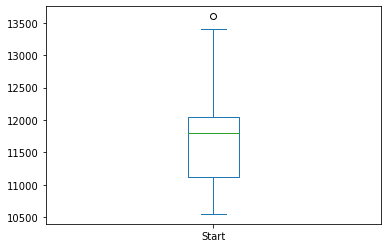

In [63]:
import matplotlib.pyplot as plt

df.Start.plot(kind='box')
plt.show() # 맨 위에 이상치 확인

In [64]:
# IQR(InterQuartile Range): 제 3사분위수 - 제1사분위수. p50
# upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
# 이상치: upper whisker를 벗어나는 값

Q1 = np.percentile(df.Start, 25)   #df.Start.describe()['25%'] 도 표기상 같음
Q3 = np.percentile(df.Start, 75)
print(f'Q1 : {Q1}')
print(f'Q3 : {Q3}')

IQR = Q3-Q1
uw = Q3 + IQR*1.5   # 이 수치 이내의 값 중 최댓값이 upper whisker
print(f'{uw}를 초과하는 값은 이상치이다.')

Q1 : 11125.0
Q3 : 12050.0
13437.5를 초과하는 값은 이상치이다.


In [68]:
# Start컬럼의 이상치 추출 : df1
df1 = df[df['Start'] > uw]
df1

,Date,Close,Start,High,Low,Volume
11,2018-06-15,13400,13600,13600,12900,201376


In [69]:
# Start컬럼의 이상치 제거
df2 = df.drop(df1.index)
df2

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


- 과제 08/22 (5)

표본분산과 불편분산의 차이의 사례를 들어 설명하세요.

In [ ]:
# 표본분산
표본분산은 모분산과 동등하지 않기 때문에 공정하지 않을 수 있음>분산을 과소추정
# 불편분산
분산을 계산할때 n(개수)이 아닌 n-1로 나눈 분산. 통계에서 보통 사용하는것

### 함수

- 중앙값 : np.median()
- 평균 : np.mean()
- 합 : sum()
- 최빈값 : pd.Series().mode()    (DataFrame,Series 사용)
- 퍼센트 : np.percentile(대상(df.Start), 퍼센트(25))


In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/ch2_scores_em.csv')
# , index_col="student number")
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [37]:
scores = np.array(df.english)[:10]

In [38]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E',
                                       'F','G','H','I','J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [39]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [40]:
# 편찻값
# 편차값 : 평균이 50, 표준편차가 10이 되도록 정규화한 값
z = 50 + 10 * z
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


-- Box plot 의미 해석
* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [41]:
# 표준화( (데이터-평균)/표준편차 )
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [42]:
# 표준화된 데이터는 평균이 0, 표준편차가 1
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

In [43]:
# 편찻값 : 평균이 50, 표준편차가 10이 되도록 정규화한값.(50+10*표준화)
z = 50 + 10 * z

In [44]:
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [45]:
# 50명의 영어 점수 배열
english_scores = np.array(df['english'])

# 시리즈로 변환하고 describe
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [69]:
# 도수분포표
# freq, _ = : 두번째는 계급값이 나와서 튜플형태로 두번째값 무시
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [54]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [61]:
# 계급값. 각 계급을 대표하는값, 계급의 중앙값
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [62]:
# 상대도수 : 전체 데이터에서 해당 계급의 데이터 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [63]:
# 누적상대도수 : 해당 계급까지의 상대도수의 합. np.cumsum 사용
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [71]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_relative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value', 'frequency',
                             'relative_frequency', 'cumulative_relative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_relative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [72]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class_value']

65

In [75]:
import matplotlib.pyplot as plt

%matplotlib inline

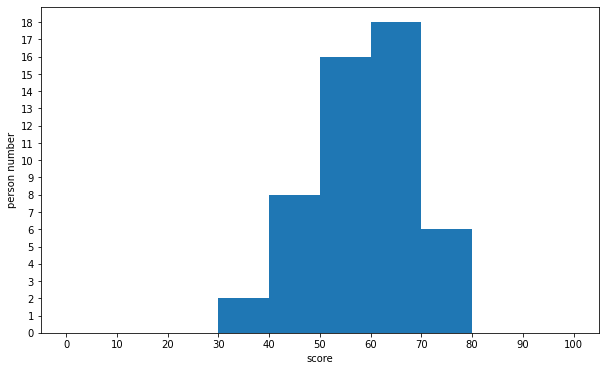

In [77]:
# 히스토그램

# 캔버스 생성, figsize로 가로, 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 그래프 그리기 위한 영역 지정
# 인수는 영역을 1x1개 지정, 하나의 영역에 그림을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 히스토그램
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
# X축 레이블 부여
ax.set_xlabel('score')
# Y축 레이블 부여
ax.set_ylabel('person number')
# X축을 0, 10, 20, ... 100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))

plt.show() # 계급폭이 10점

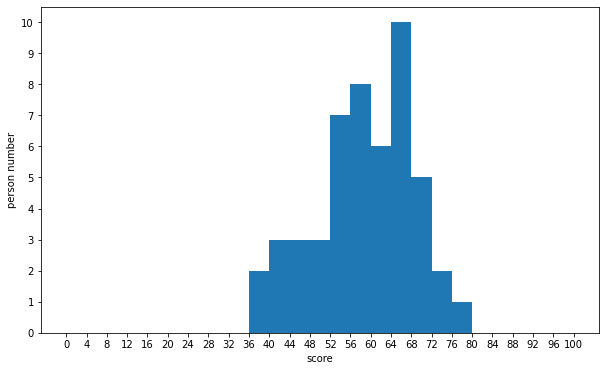

In [79]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# 계급폭을 4점으로 한다면?
freq, _ , _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

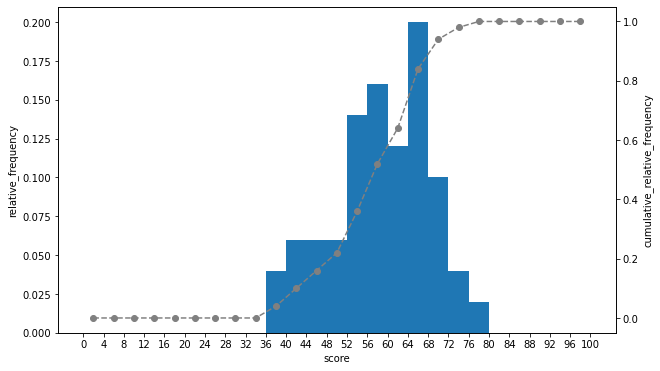

In [102]:
fig = plt.figure(figsize=(10,6))
# 111의 의미는, 1행째의 1열의 첫 번째라는 의미로, subplot(1, 1, 1) 로 작성해도 동일하게 작동한다.
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]
# 꺾은선 그래프 그림
# 인수 ls(엘에스)를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'로 하면 데이터 점을 그림
# color인수로 색상
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative_frequency')
ax2.set_ylabel('cumulative_relative_frequency') # 점선 : 누적상대도수
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show() # 히스토그램과 누적상대도수

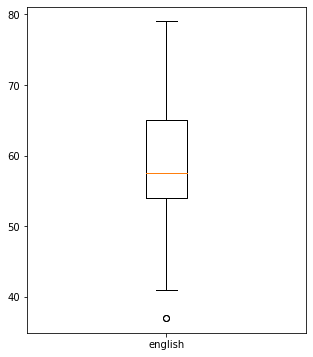

In [81]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show() # 색깔 있는 선이 Q2, 중앙값.

## 2차원데이터 정리

In [82]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [86]:
df = pd.read_csv('dataset/ch2_scores_em.csv', index_col='student number')
df.head(3)

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63


In [104]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [105]:
# 공분산 : 부호를 붙인 면적의 평균
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [107]:
summary_df['product of deviations'].mean()

62.800

In [108]:
# 공분산 행렬(분산공분산 행렬)
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [109]:
# 파이썬 인덱스 0부터 시작해서 0,1 , 1,0 성분이 공분산
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [110]:
# 0,0 : 영어의 분산, 1,1 : 수학의 분산
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [111]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [113]:
# 상관계수 : 단위에 의존하지 않는 상관을 나타내는 지표
# 영어와 수학 점수의 상관계수
np.cov(en_scores, ma_scores, ddof=0)[0,1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.819

In [114]:
# 상관행렬
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [115]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

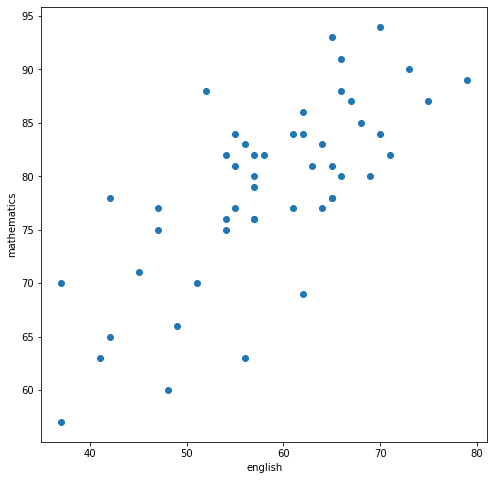

In [117]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

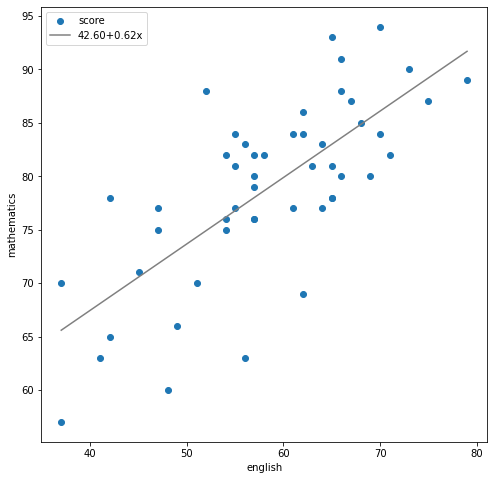

In [120]:
# 회귀직선 : np.polyfit, np.poly1d 사용
# 계수 B_0과 B_1을 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# B_0+B_1 x를 반환하는 함수 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
# 범례 표시
ax.legend(loc='upper left')

plt.show() # 산점도와 회귀직선

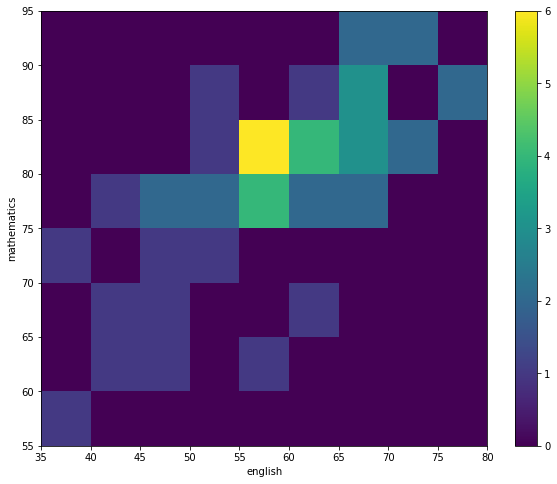

In [183]:
# 히트맵
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

- 과제 08/23 (2)
-일차원 데이터를 생성하여 다음을 수행하세요.

도수분포표를 만들고 히스토그램으로 시각화하세요.(계급을 변경하여 2개를 작성)(#11)

상대도수 및 누적상대도수를 도수분포표에 추가(#9)하고 히스토그램과 누적상대도수를 시각화(#12)하세요.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np

np.random.seed(0)
sr = pd.Series(np.random.randint(1000,10000,size=(20)),
                        index=['철수', '민수', '진수', '만수', '승수', '현수', '예수', '식수', '소수', '국수',
                              '은서','민서','연서','경서','줄서','지연','유연','주연','연연','조커'])
df = pd.DataFrame(sr)
df.columns = ['extra_charges']
df.head()

,extra_charges
철수,3732
민수,4264
진수,5859
만수,8891
승수,5373


In [5]:
# 1. 잔액 array
extra = np.array(df['extra_charges'])
# 2. 시리즈로 변환, describe
pd.Series(extra).describe()

count      20.000000
mean     5359.600000
std      2213.935087
min      1537.000000
25%      3698.750000
50%      5612.000000
75%      7081.000000
max      8891.000000
dtype: float64

In [6]:
# 3. array로 도수분포표
freq, _ = np.histogram(extra, bins=10, range=(1000, 10000))
freq

array([2, 0, 3, 4, 1, 3, 3, 2, 2, 0], dtype=int64)

In [7]:
# 4. DF로 결과 정리. 계급 1000단위로 1만까지
freq_class = [f'{i}~{i+1000}' for i in range(0,10000,1000)]   # class : 계급

# 5. freq_class를 인덱스로 DF만들기 >> 도수분포표 완성
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~1000,2
1000~2000,0
2000~3000,3
3000~4000,4
4000~5000,1
5000~6000,3
6000~7000,3
7000~8000,2
8000~9000,2


In [8]:
# 6. 계급값. 계급의 중앙값
class_value = [(i+(i+1000))//2 for i in range(0,10000,1000)]
class_value

[500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]

In [9]:
# 7. 상대도수 추출
rel_freq = freq / freq.sum()
rel_freq

array([0.1 , 0.  , 0.15, 0.2 , 0.05, 0.15, 0.15, 0.1 , 0.1 , 0.  ])

In [10]:
# 8. 누적상대도수 추출
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.1 , 0.1 , 0.25, 0.45, 0.5 , 0.65, 0.8 , 0.9 , 1.  , 1.  ])

In [11]:
import warnings
warnings.filterwarnings('ignore')
# 9. 도수분포표에 계급값, 상대도수, 누적상대도수 추가하기
freq_dist_df['계급값'] = class_value
freq_dist_df['상대도수'] = rel_freq
freq_dist_df['누적상대도수'] = cum_rel_freq
freq_dist_df = freq_dist_df[['계급값', 'frequency', '상대도수', '누적상대도수']]
freq_dist_df

,계급값,frequency,상대도수,누적상대도수
class,,,,
0~1000,500,2,0.10,0.10
1000~2000,1500,0,0.00,0.10
2000~3000,2500,3,0.15,0.25
3000~4000,3500,4,0.20,0.45
4000~5000,4500,1,0.05,0.50
5000~6000,5500,3,0.15,0.65
6000~7000,6500,3,0.15,0.80
7000~8000,7500,2,0.10,0.90
8000~9000,8500,2,0.10,1.00


In [12]:
# 10. 최빈값 확인
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), '계급값']

3500

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

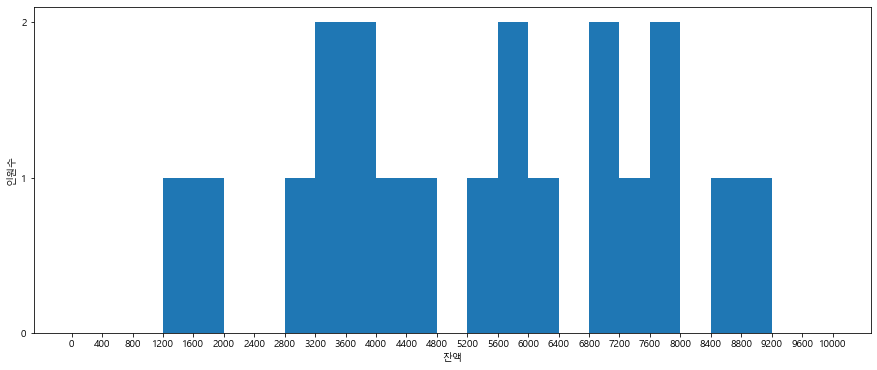

In [14]:
# 11-1. 히스토그램(bins=25)
font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
# 계급수 10으로 히스토그램그리기
freq, _, _ = ax.hist(extra, bins=25, range=(0,10000))
ax.set_xlabel('잔액')
ax.set_ylabel('인원수')
ax.set_xticks(np.linspace(0,10000,25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

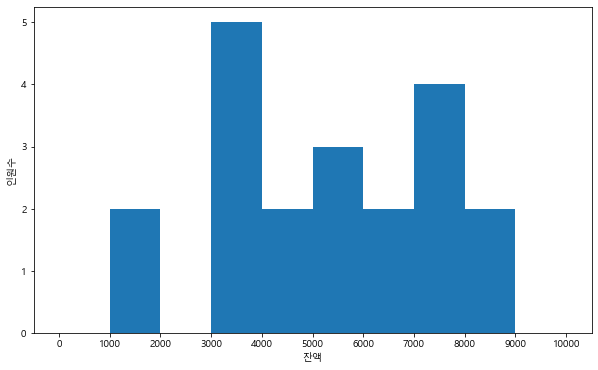

In [15]:
# 11-2. 히스토그램(bins=10)
from matplotlib import font_manager, rc # 한글넣기

font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# 계급수 10으로 히스토그램그리기
freq, _, _ = ax.hist(extra, bins=10, range=(0,10000))
ax.set_xlabel('잔액')
ax.set_ylabel('인원수')
ax.set_xticks(np.linspace(0,10000,10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (10,)

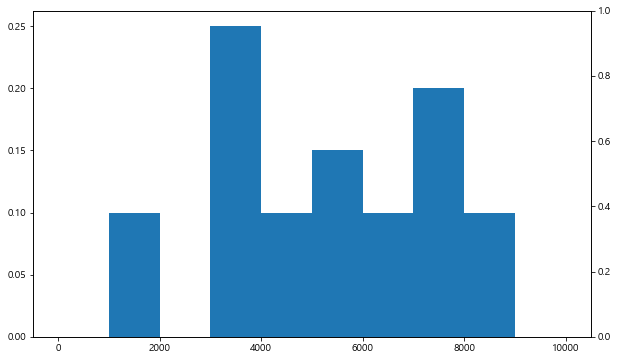

In [25]:
# 12. 히스토그램+누적상대도수
from matplotlib import font_manager, rc # 한글넣기
import warnings

warnings.filterwarnings('ignore')

font_path = 'dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력

fig = plt.figure(figsize=(10,6))
# 111의 의미는, 1행째의 1열의 첫 번째라는 의미로, subplot(1, 1, 1) 로 작성해도 동일하게 작동한다.
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(extra) / len(extra)
rel_freq, _, _ = ax1.hist(extra, bins=10, range=(0,10000), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+1000))//2 for i in range(0,10000,10)]
# 꺾은선 그래프 그림
# 인수 ls(엘에스)를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'로 하면 데이터 점을 그림
# color인수로 색상
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('extra_charges')
ax1.set_ylabel('상대도수')
ax2.set_ylabel('누적상대도수') # 점선 : 누적상대도수
ax1.set_xticks(np.linspace(0,10000,10+1))

plt.show()

- 앤스컴의 예

In [30]:
import pandas as pd
anscombe_data = np.load('./dataset/ch3_anscombe.npy')
print(anscombe_data.shape) # 11행2열이 4개
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [32]:
import pandas as pd

# correlation : 상관계수, regression line : 회귀직선
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance',
                              'X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0] 
    dataY = data[:,1] # 두번째 열을 y에
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
        f'{np.var(dataX):.2f}',
        f'{np.mean(dataY):.2f}',
        f'{np.var(dataY):.2f}',
        f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
        f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


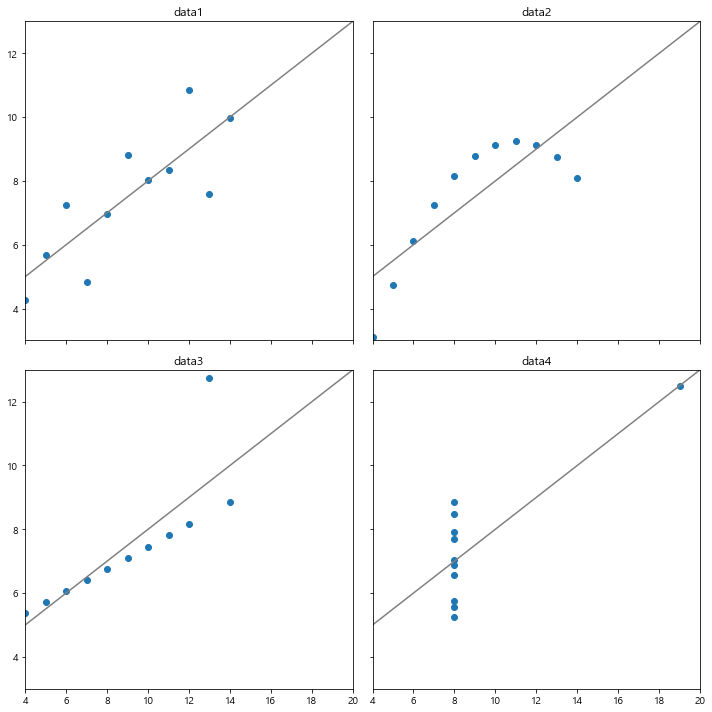

In [34]:
# 2x2개의 그래프 영역 생성
import matplotlib.pyplot as plt
# sharex/sharey : 4개그래프에 x,y축 공유
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                       sharex=True, sharey=True) 
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    # 타이틀 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')
    
# 그래프 사이 간격좁히기
plt.tight_layout()
plt.show()

#### polyfit 함수 사용법

poly(x,y차수) 형태로 매우 간단하게 이용이 가능

In [36]:
x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1)) # y = 3.314x - 3.6

[ 3.31428571 -3.6       ]


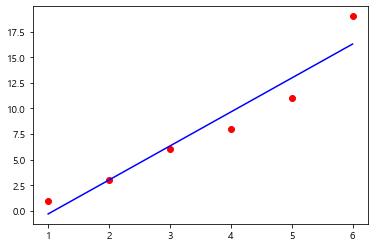

In [38]:
poly = np.polyfit(x,y,1) # x값, y값, 1차원
y_pred = np.array(x)*poly[0] + poly[1]

plt.plot(x, y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

#### 2차 회귀식 및 시각화

In [39]:
print(np.polyfit(x,y,2))

[ 0.53571429 -0.43571429  1.4       ]


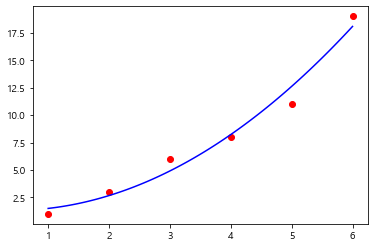

In [40]:
poly = np.polyfit(x,y,2)
x_line = np.linspace(1,6,100) # 곡선을 완만하게 그리기 위한 linspace 객체 선언
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]

plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

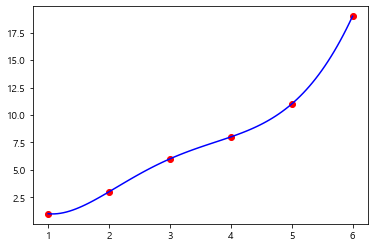

In [42]:
# 5차
poly = np.polyfit(x,y,5)
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line) # 예측값을 담을 그릇(모든 값이 0인 배열)
for i in range(6):
    y_pred += x_line**(5-i)*poly[i]
plt.plot(x_line,y_pred,color='b')
plt.scatter(x,y,color='r')
plt.show()

- 과제 08/24 (1)
p.84~p.112

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
df = pd.read_csv('./python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

- 복원추출 (여러차례 동일한 표본을 선택하는 추출)

In [54]:
np.random.choice([1,2,3],3) # np.random.choice(a,b,replace=) :
                            # 0이상 a미만 b개 뽑기, True=중복허용,default

array([1, 3, 1])

- 비복원추출 (동일한 표본은 한번만)

In [55]:
np.random.choice([1,2,3],3,replace=False)
# np.random.choice([1,2,3],3,False)

array([1, 2, 3])

In [56]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [57]:
# 샘플A. 표본크기 20, 표본평균 계산하기
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [59]:
# 모평균
scores.mean()
# A의 점수는 평균보다 조금높다고 추측

69.53

In [63]:
# 무작위추출 표본평균 p.96
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 70.65
2번째 무작위추출로 얻은 표본평균 69.95
3번째 무작위추출로 얻은 표본평균 68.8
4번째 무작위추출로 얻은 표본평균 69.15
5번째 무작위추출로 얻은 표본평균 71.25


## 확률 모형

### 확률분포

In [89]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

np.random.choice(dice, p=prob)

6

In [90]:
# https://jimmy-ai.tistory.com/60 np.random.choice 참조
# np.random.choice(sample 집단, sample 개수, 복원 추출 여부(True/False), 확률 리스트)
# sample 집단은 원하는 sampling되기 원하는 값들을 지정해주면 되는데,
# 정수로 지정시 0 ~ 해당 숫자 - 1 범위에서 정수 sampling이 됩니다.
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
# dice : 샘플집단, num_trial : 샘플개수, p=prob : 확률리스트
sample

array([6, 3, 4, 5, 5, 4, 4, 3, 6, 2, 2, 5, 6, 5, 1, 4, 6, 5, 6, 1, 5, 3,
       6, 2, 4, 6, 5, 4, 3, 1, 2, 5, 4, 6, 3, 3, 6, 6, 5, 6, 4, 6, 6, 5,
       4, 6, 6, 2, 5, 2, 4, 5, 3, 4, 5, 6, 4, 5, 5, 5, 6, 3, 6, 5, 6, 3,
       6, 4, 6, 5, 3, 4, 2, 6, 4, 6, 6, 4, 5, 3, 3, 6, 3, 1, 2, 4, 6, 5,
       1, 4, 6, 5, 5, 4, 5, 4, 3, 6, 1, 4])

In [66]:
# p.102 도수분포표
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency' :freq / num_trial},
            index = pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,4,0.04
2,13,0.13
3,17,0.17
4,16,0.16
5,22,0.22
6,28,0.28


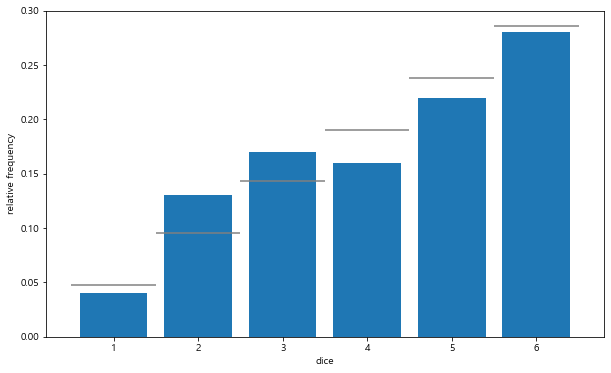

In [68]:
# p.103 확률분포와 함꼐 히스토그램 그리기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
# density : 밀도
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프의 [1.5, 2.5, ... 6.5]에 눈금 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show() # 100번 시행시 주사위 눈에 대한 히스토그램

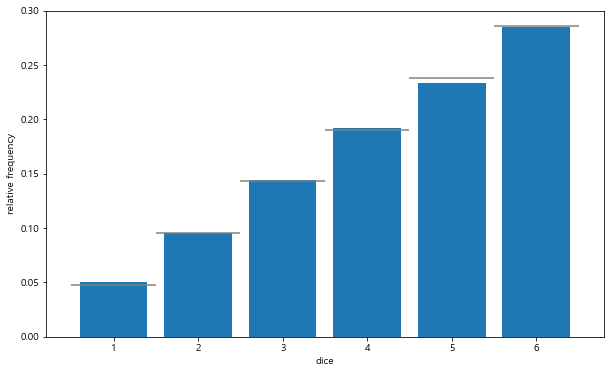

In [69]:
# 차이가 큰것같아 10000회 시행
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show() # 1만번 시행시 주사위 눈의 히스토그램.
#상대도수가 실제 확률분포에 가까워짐

## 추측통계의 확률

In [93]:
import pandas as pd

df = pd.read_csv('./python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

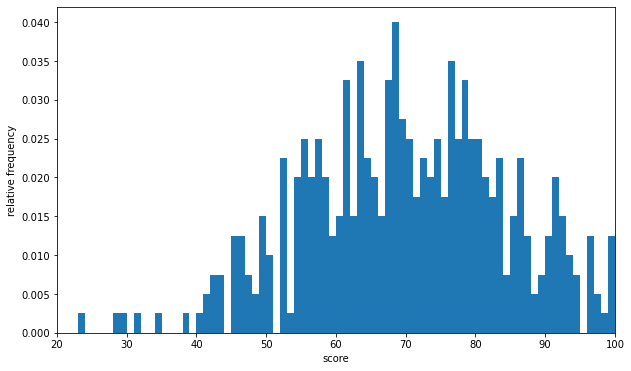

In [94]:
# p.106 전교생 시험점수 분포확인, 계급폭 1점, 히스토그램.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True) # 100까지의 범위를 100구간으로 쪼갰으니 계급폭 : 1
ax.set_xlim(20,100) # 축의 제한 설정
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show() # 전교생 시험점수에 대한 히스토그램

In [72]:
np.random.choice(scores)

76

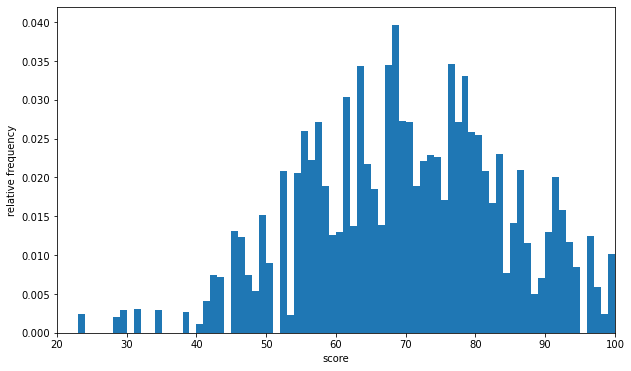

In [95]:
# p.108 무작위추출로 샘플사이즈10000인 표본 추출, 히스토그램.
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100) # 축의 범위. 수치제한
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show() # 표본의 크기가 커지면 실제 점수 분포에 매우 가까워짐

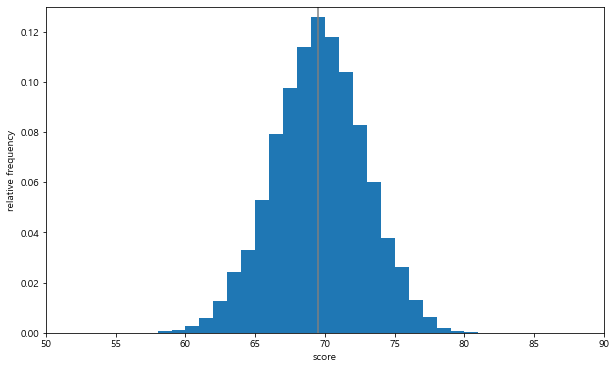

In [75]:
# 무작위추출로 표본 크기가 20인 표본 추출
# 표본평균 계산하는 작업 1만번 수행, 히스토그램
# 표본평균의 분포 확인

sample_means = [np.random.choice(scores, 20).mean()
               for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
# 모평균 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50,90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

- 과제 08/24 (2)

적절한 데이터를 생성하고 polyfit을 이용하여 2,3차방정식을 만든 후 산점도 및 회귀식을 시각화하여 그 의미를 해석하세요

자동차 제동거리?

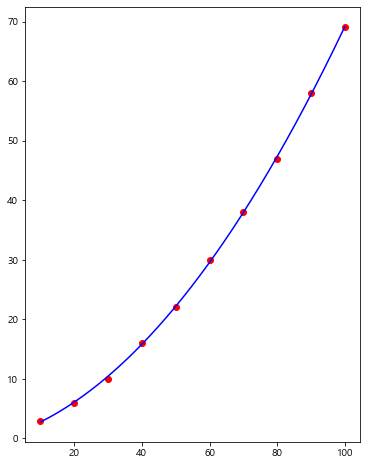

In [108]:
x = [10,20,30,40,50,60,70,80,90,100]  # 속도(km/h)
y = [3,6,10,16,22,30,38,47,58,69] # 제동거리(m)

# 2차방정식, 산점도 및 회귀식
poly = np.polyfit(x,y,2)
x_line = np.linspace(10,100,1000) # 10~100 1000개로 쪼갬
y_pred = x_line**2*poly[0] + x_line*poly[1] + poly[2]  # 2차방정식 생성


fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)
ax.plot(x_line, y_pred, color='b')
ax.scatter(x,y,color='r')
plt.show()

In [102]:
print(np.polyfit(x,y,2)) # 2차방정식 ax^2+bx+c 의 a,b,c

[0.00503788 0.18340909 0.41666667]


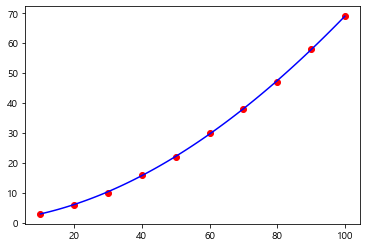

In [88]:
# 3차방정식
poly = np.polyfit(x,y,3)
x_line = np.linspace(10,100,100)
y_pred = np.zeros_like(x_line)
# for구문 이용해서 방정식 만들기
for i in range(4): # 3차라서 3+1
    y_pred += x_line**(3-i)*poly[i]
plt.plot(x_line, y_pred, color='b')
plt.scatter(x,y,color='r')
plt.show()

In [101]:
print(poly) # 2차로 보이지만 3차방정식. ax^3+bx^2+cx+d 에서 a,b,c,d이다.

[-5.63325563e-06  5.96736597e-03  1.40540016e-01  9.00000000e-01]


- 속도가 빨라질수록 자동차 제동거리가 길어진다.

- 과제 08/24 (3)

"어떤 모집단에서 표본을 랜덤하게 추출하여 표본평균을 구하면 그 표본평균은 모평균을 중심으로 분포한다." 라는 주장을 사례를 만들어 설명하세요.

표본평균이 모평균을 중심으로 분포하는 이유

표본평균의 평균이 모평균을 중심으로 분포하기 때문이다. 밑에 설명

In [ ]:
li = (a, b, c)
# li의 모평균은 (a+b+c)/3

# 표본평균 구하기. 표본의 크기는 2
q1 = (a+b)/2 # 표본 q1 = a, b
q2 = (b+c)/2 # 표본 q2 = b, c
q3 = (c+a)/2 # 표본 q3 = c, a

(q1+q2+q3)/3 # 표본평균들의 평균
 = (a,b,c)/3
    
>> 이것은 모평균과 같은 수치다
표본을 랜덤으로 추출하는 행위가 반복되면 표본평균의 평균이 나오게 되고, 결국 모평균을 따라가게 된다.

#  이산형 확률변수

## 1차원 이산형 확률변수

- 이산형 확률변수 : 취할 수 있는 값이 이산적인 확률변수

- 확률질량함수(확률함수, probability mass function, PMF)

f(x) = P(X = x)

- 확률분포 : 확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응.

확률변수의 확률분포가 결정되면 그 확률변수의 움직임이 정해짐

확률 변수가 특정한 값을 가질 확률을 나타내는 함수

In [1]:
# 1차원
import numpy as np
import matplotlib.pyplot as plt

%precision 3

'%.3f'

In [ ]:
x_set = np.array([1,2,3,4,5,6])  # p.116.
def f(x):    # 확률변수 f(x)
    if x in x_set:  # x_set : 확률변수가 취할수 있는 값의 집합
        return x/21
    else :
        return 0

- 확률변수 X

In [98]:
# 확률변수 X 정의. 집합(x_set)과 확률변수함수(f)를 요소로 하는 리스트로 구현
# 이 확률분포에 의해 확률변수 X의 동작이 결정되기 때문
X = [x_set, f] 

In [8]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set]) # 확률
print(prob, '\n') # 각각 나올확률이 다르도록 부여. 위에 사용자함수로 지정한 확률변수 f(x)사용
dict(zip(x_set, prob)) # 주사위 눈금마다 빈도가 다르게 나오는걸 확인 가능

[0.048 0.095 0.143 0.19  0.238 0.286] 



{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

Text(0.5, 1.0, 'Bar Graph')

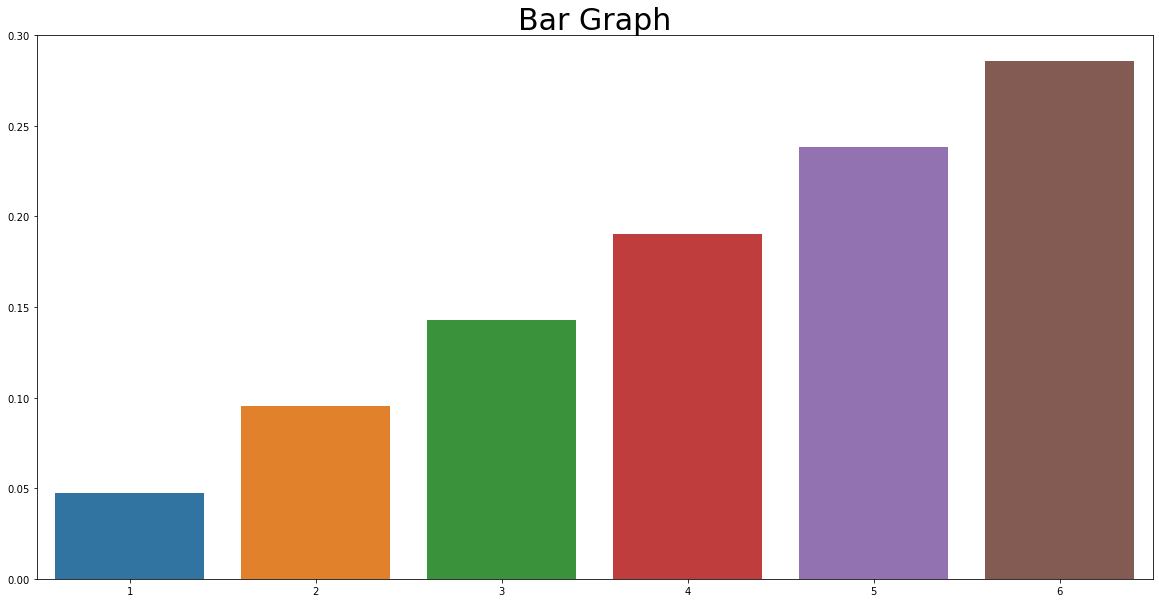

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,10)) # 그래프사이즈
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)
# f함수(사용자함수f(x))는 확률을 대응시켜줌

- 확률의 성질 

확률은 절대적으로 0 이상으로, 모든 확률을 더하면 1이 된다.

In [16]:
np.all(prob >=0) #확률은 0보다크다?

True

In [18]:
np.sum(prob) # 확률의 합은 1

1.000

- 누적분포함수(분포함수. cumulative distribution function, CDF) p.120

In [99]:
def F(x): # 누적분포함수. 특정값 이하가 되는 확률의 합을 구할 수 있음
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
                # f(x_k) : x의 확률변수
                            # x_k : 확률
                                   # x_set : 집합

In [100]:
F(3) # 눈이 3이하가 되는 확률. 1/21(0.048) + 2/21(0.095) + 3/21(0.143) = 2/7

0.286

In [22]:
F(6)

1.000

- 확률변수의 변환 : 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다. (p.121)

In [101]:
# 2X+3을 확률변수 Y라고 하자.
y_set = np.array([2*x_k + 3 for x_k in x_set]) # y=2x+3 파이썬형식으로 쓴것
prob = np.array([f(x_k) for x_k in x_set]) # f(x_k) : 확률변수 구하는 함수 위에서 정의함
dict(zip(y_set, prob)) # Y의 확률분포

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표 (p.122)

In [102]:
# 불공정한 주사위의 기댓값
np.sum([x_k * f(x_k) for x_k in x_set])
# x_set은 확률변수.1~6, 각각의 나올 확률은 1/6.
# 1*1/6 + 2*1/6 + ... + 6*1/6 ?

4.333

 - 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
 
확률변수는 특정 사건에 대해 나올수 있는 변수들.

ex> 동일한 규격의 동전 3개를 던져 앞면이 나온 개수만큼 100원을 획득하고 뒷면이 나온 개수만큼 100원을 지불하는 게임을 진행해보겠습니다.

이때의 확률변수 X는 이 게임을 통해 얻는 수익으로 이야기 가능합니다.

이때의 표본공간(S)에는 [{BBB}, {FBB}, {BFB} {BBF}, {FFB} {FBF} {BFF} {FFF}]의 원소가 구성됩니다.

확률변수(X) = {-300, -100,100,300} 

확률분포는 각각의 확률변수들의 비중으로 이해하면 쉬울듯

확률분포

// *확률 질량 함수 f(x) = P(X = x)

f(-300) = 1/8

f(-100) = 3/8

f(100)  = 3/8 

f(300) = 1/8

기댓값 : 확률변수마다 분포된 확률(확률분포)을 각각 곱한것의 합. 기호는 E(X), 뮤(μ)사용

확률변수의 평균 : 확률변수를 몇 번이나(무제한) 시행하여 얻어진 실현값의 평균. 기댓값.

표본평균의 평균이 모평균을 따라간다는 것과 비슷한 느낌

In [31]:
sample = np.random.choice(x_set, int(1e6), p=prob)  # 1e6 = 10^6, p= : p에 해당하는 확률에 준해서 뽑음.
# sample = np.random.choice(x_set, int(1e6)) 확률 따로 부여하지 않으면 각각 동일한 확률
np.mean(sample)

4.333

- 이산형 확률변수의 기댓값

확률변수 E(X)가 있다고 치면

E(Y) = E(2X+3)을 넣어도 확률변수가 됨.

그럼 확률변수 E(Y)의 기댓값 성립

In [104]:
# 일반화
# 이산형 확률변수의 기댓값
# 인수 g가 확률변수에 대한 변환의 함수(2X+3같은거) 
def E(X, g=lambda x: x):
    x_set, f = X
# 집합, 확률함수 = 확률변수
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])
  # return np.sum([g(i) * f(i) for i in x_set])
                # x의확률을 각각 확률변수와 확률함수에 넣고 곱함
    
# g 에 아무것도 지정하지 않으면 확률변수 X의 기댓값이 구해짐

In [105]:
E(X)  # X = [x_set, f]라고 위에서 정의함

4.333

- 기댓값의 선형성 (p.125)

E(X)가 1차원이니깐 g(X)에 뭐가 들어가던 E(X)의 값을 기준으로 수치가 변경됨 >> 선형구조 유지

E(2X+3) = 2E(X)+3 이 같음, 상수항은 따로 봐도됨

E(aX+b) = aE(X)+b

In [106]:
E(X, g=lambda x: 2*x + 3)

11.667

In [107]:
2 * E(X) + 3

11.667

- 확률변수의 분산(p.127~128)

분산은 V(X)나 σ^2(시그마)로 사용. 표준편차의 제곱

a, b는 실수, X를 확률변수라고 하면,

V(aX+b) = a^2V(X) 가 성립

- 분산 V(X)

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kjihoon0914&logNo=221207297959

Q1 > 주사위를 던져 나오는 수를 확률 변수 X로 하고 그 나오는 수에 200원 곱한 후 100원 더한 금액이 확률변수 Y라고 가정하겠습니다.

이 두 가지 확률 실험을 확률변수 X만을 이용하여 Y의 기댓값과 분산을 산출해보겠습니다.

.

확률변수 X : 1,2,3,4,5,6

확률질량함수 f(x) : 1/6 (모두 동일한 확률을 지님)

기대값 E(X) ; 1/6*(1+2+3+4+5+6) = 7/2

분산 Var(X) : 1/6*(1^2+2^2.....6^2)-(7/2)^2 = 35/12

.

확률변수 Y : 300,500,700,900,1100,1300

확률질량함수 f(y) : 1/6

기대값 E(Y) = E(200X+100) = 200E(X)+100 = 800

분산 Var(X) = Var(200X+100) = 4000Var(X) = 11666.67

In [108]:
mean = E(X) # 확률변수 X의 기댓값 : E(X), 기댓값은 확률변수의 중심위치를 나타냄
            # 분산은 산포의 크기를 나타냄
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set]) # 편차의 제곱은 분산.

2.222

In [53]:
def V(X, g=lambda x: x) : # 인수 g가 확률변수에 대한 변환의 함수
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [54]:
# g를 지정하지 않으면 확률변수X의 분산을 계산함.
V(X)

2.222

In [57]:
V(X, lambda x: 2*x + 3) # 분산이기때문에 상수항 3은 필요없긴함

8.889

In [56]:
2**2*V(X)

8.889

##  2차원 이산형 확률변수

- 결합확률분포 (p.131)

In [58]:
# 확률의 성질
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [59]:
def f_XY(x, y) :
    if 1 <= y <=6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else :
        return 0

In [60]:
XY = [x_set, y_set, f_XY]

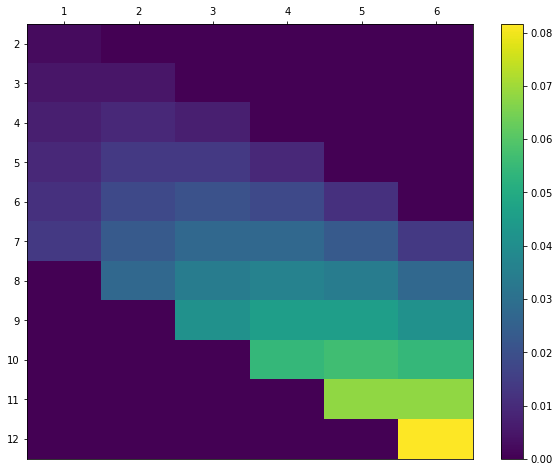

In [62]:
# 확률분포를 히트맵으로
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [64]:
np.all(prob>=0) # 확률이 반드시 0이상 되는지 확인

True

In [65]:
np.sum(prob) # 확률 총합 1인지도 확인

1.000

- 주변확률분포(=주변분포) p.134

In [68]:
# X의 주변분포와 Y의 주변분포
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])  # f_XY 는 위에서 결합확률분포로 정의함(p.132)

In [69]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [70]:
X = [x_set, f_X]
Y = [y_set, f_Y]

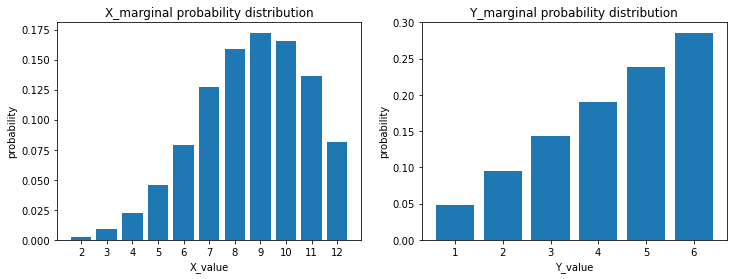

In [71]:
# X와 Y의 확률분포 그리기, prob_x와 prob_y가 확률로서의 성질을 만족하는것 확인
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show() # 주변분포

### 2차원 이산형 확률변수의 지표

- 기댓값(p.136)

In [72]:
np.sum(x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set)

8.667

- 기댓값의 선형성 (p.138)

a, b는 실수, X,Y는 확률변수

E(aX+bY) = aE(X) + bE(Y)

In [73]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [74]:
# X와 Y의 기댓값
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [75]:
mean_Y = E(XY, lambda x, y: y)
mean_Y # 기댓값에는 선형성이 있음. 확률변수가 2차원이 되어도 마찬가지

4.333

In [76]:
a, b = 2, 3

In [77]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [78]:
a * mean_X + b*mean_Y

30.333

- 분산 (p.139)

In [79]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444

In [80]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [81]:
# X,Y의 분산
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [82]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

- 공분산 (p.140)

In [83]:
# 두개의 확률변수 X,Y 사이의 상관정도 확인
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [84]:
cov_xy = Cov(XY)
cov_xy

2.222

- 분산과 공분산의 공식 (p.141)

a,b를 실수, X,Y를 확률변수로 할때 

.


V(aX+bY) = a^2 * V(X) + b^2 * V(Y)  +  2abCov(X, Y)

In [85]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [86]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

- 상관계수

In [87]:
# 확률변수의 상관계수는 공분산을 각각의 표준편차로 나누어 구함
cov_xy / np.sqrt(var_X * var_Y)

0.707

- 과제 08/25 (2)

1차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성과 분산의 공식을 입증하세요.

- 과제 08/26 (3)

2차원 이산형 확률변수의 변환 사례를 생성하여 기댓값의 선형성, 분산과 공분산의 공식을 입증하세요.

In [ ]:
선형성은 계수를 가지고 얘기하는것. 곡선도 가능하니 주의할 것

#  대표적인 이산형 확률분포

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [3]:
# 그래프에서 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X # 확률함수지만 확률로 생각해도됨
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
# assert : 해당 조건을 확신한다는 뜻
# assert는 이 조건이 참일때 코드는 내가 보장한다. 이 조건은 올바르다!
# 하지만 이 조건이 거짓이라는 것은 내가 보증하지 않은 동작이다.
# 그러니 AssertionError를 발생해라.
    
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 베르누이 분포

- 확률변수가 취할 수 있는 값이 두가지 밖에 없음

1이 나올확률 p, 0이 나올확률 1-p

- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라하며 1이 나오면 성공 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률

- 베르누이 분포의 기댓값과 분산

X ~ Bern(p)일때,

E(X) = p,  V(X) = p(1-p)

In [11]:
x_set = np.array([1,2,3,4,5,6])  # p.116.

# p.149
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set :
            return p**x*(1-p)**(1-x)
        else :
            return 0
    return x_set, f

p = 0.3
X = Bern(p)

In [12]:
check_prob(X)

expected value 0.3
variance 0.21


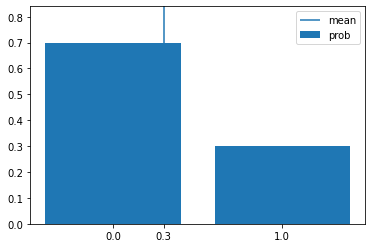

In [13]:
plot_prob(X) # 베르누이 분포

- pmf : 확률함수 계산. 0과 1을 넘겨주면 그 값을 취하는 확률이 반환

In [15]:
# bernoulli : 베르누이 분포를 따르는 확률변수를 생성. 인수로 파라미터 p를 취함
rv = stats.bernoulli(p)

In [17]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [32]:
# pmf메서드는 인수로 리스트를 넘길 수 있음 각각의 확률 반환
rv.pmf([0,1])

array([0.7, 0.3])

In [33]:
# cdf 메서드 사용하면 누적밀도함수(누적분포함수) 계산
rv.cdf([0,1])

array([0.7, 1. ])

In [35]:
# mean > 기댓값, var > 분산
rv.mean(), rv.var()

(0.300, 0.210)

##  이항분포

- 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
- n=1인 이항분포는 베르누이 분포이다.

f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)
       
       0                     (otherwise)


In [36]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set :
            return comb(n,x) * p**x *(1-p)**(n-x)
        else :
            return 0
    return x_set, f

In [37]:
# 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포
n = 10
p = 0.3
X = Bin(n,p) # 여기서 "="은 같다는 뜻이 아니라 베르누이 시행에서 n, p를 **따른다**는 뜻

In [38]:
check_prob(X)  # 기댓값, 분산.
# 기댓값은 10x0.3 = 3,
# 분산은 10x0.3x0.7 = 2.1

expected value 3.0
variance 2.1


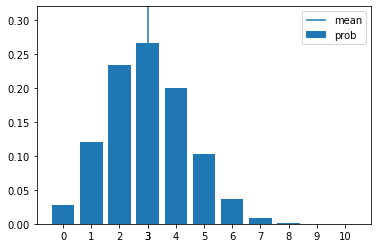

In [40]:
plot_prob(X) # 이항분포는 기댓값이 정상이 되는 산 모양의 분포

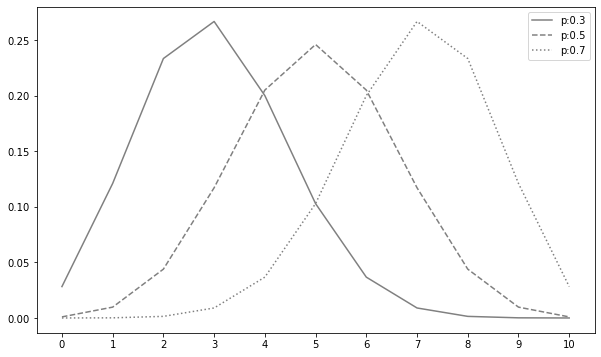

In [42]:
# n=10으로 고정하고 p=0.3, 0.5, 0.7로 변화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()
# p가 커질수록 정상이 되는 값이 커짐.
# p = 0.5일때는 좌우대칭, 0.3과 0.7은 서로 대칭관계

## 기하분포

- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포

- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{0,1,2,3,..\})$

       0              (otherwise) 
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$

In [43]:
def Ge(p):  # Geometry
    x_set = np.arange(1,30) # 편의상 1~29로 설정. 원래는 1 이상 정수전체
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else :
            return 0
    return x_set, f

In [44]:
p = 0.5
X = Ge(p)

In [45]:
check_prob(X)
# 기댓값 : 1 * (1/2) = 2
# 분산 : (1 - (1/2)) / (1/2)^2  =  2

expected value 2.0
variance 2.0


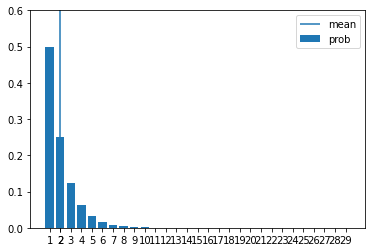

In [46]:
plot_prob(X)

- scipy.stats에서 기하분포는 geom함수로 생성 가능

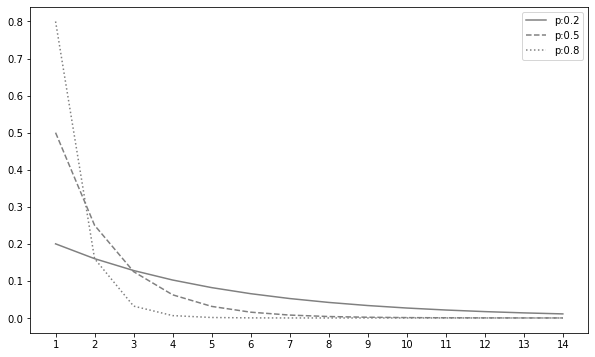

In [47]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()
# p 값이 커질수록 확률이 지수적으로 감소하는 분포가 됨

## 포아송 분포

- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포

- 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서
- 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

       0               (otherwise)


In [48]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set :
            return np.power(lam,x) / factorial(x) * np.exp(-lam)
        else :
            return 0
    return x_set, f

In [49]:
lam = 3
X = Poi(lam)

In [50]:
check_prob(X)

expected value 3.0
variance 3.0


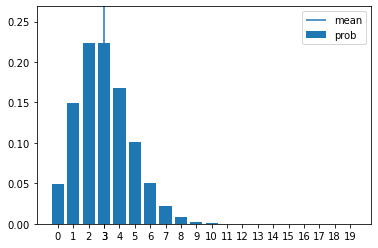

In [52]:
plot_prob(X)

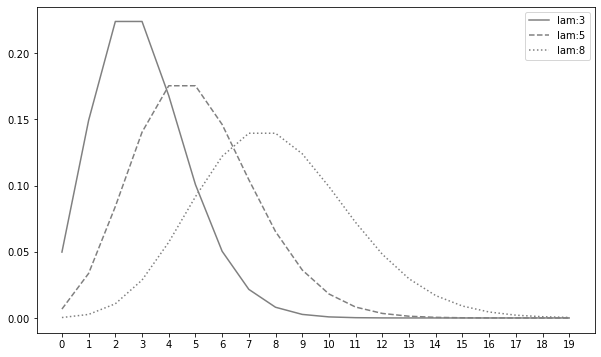

In [55]:
# 파라미터 람다를 3,5,8로 변화시키면?
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show() # 어떤 파라미터라도 분포의 정상에는 람다가 있고, 람다가 커질수록 경사면이 완만해짐
# >> 람다 커질수록 정규분포에 가까워짐

- 1차원 이산형 확률변수
 - 확률질량함수(PMF)
 - 누적분포함수(CDF)
- 2차원 이산형 확률변수
 - 결합확률함수(p.131) - 확률분포 히트맵 사용
 - 주변확률분포..

- rv = stats.bernoulli(p) 처럼 변수를 설정하고 확률함수 등 계산
- rv.pmf([0,1]), rv.cdf(~ 등

- 기하분포(파라미터:p)

기댓값 : 1/p

분산 : (1-p)/(p**2)

- 포아송 분포(파라미터:lam)

기댓값 = 분산 : lam

- 1차원 연속형 확률변수
 - 확률밀도함수(PDF)
 - 누적분포함수(CDF)
- 2차원 연속형 확률변수
 - 결합확률밀도함수
 - 

In [ ]:
불린인덱싱
df5[(df5['pclass'] == 3)]